In [1]:
import os
import numpy as np
from keras.preprocessing.image import load_img, img_to_array
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, label_binarize
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.multiclass import OneVsRestClassifier
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns
import joblib

2024-12-04 16:17:30.068401: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-04 16:17:30.167225: I external/local_xla/xla/tsl/cuda/cudart_stub.cc:32] Could not find cuda drivers on your machine, GPU will not be used.
2024-12-04 16:17:30.251261: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:477] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1733318250.387136    5795 cuda_dnn.cc:8310] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1733318250.424511    5795 cuda_blas.cc:1418] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-12-04 16:17:30.701734: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU ins

In [2]:
# data_set dizisi ve sınıflar
data_dir = 'dataset/'  
selected_classes = ['acoustic guitar', 'drums', 'Electric guitar', 'keyboard']


images = []
labels = []

for class_name in selected_classes:
    class_path = os.path.join(data_dir, class_name)
    for img_name in os.listdir(class_path):
        img_path = os.path.join(class_path, img_name)
        img = load_img(img_path, target_size=(150, 150)) 
        img_array = img_to_array(img)
        images.append(img_array)
        labels.append(class_name)


X = np.array(images) / 255.0  # normalizasyon
y = np.array(labels)


encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.2, random_state=42)

X_train_flat = X_train.reshape(X_train.shape[0], -1)
X_test_flat = X_test.reshape(X_test.shape[0], -1)

pca = PCA(n_components=50, random_state=42)
X_train_pca = pca.fit_transform(X_train_flat)
X_test_pca = pca.transform(X_test_flat)

Veri setinin ana dizini `data_dir` değişkeni ile tanımlanmıştır. Sınıflandırma işlemi için `selected_classes` listesi kullanılarak dört farklı sınıf seçilmiştir. Bu sınıfların her biri, veri setinde ayrı klasörlerde saklanmıştır. Her sınıfa ait görüntüler, `load_img` fonksiyonu kullanılarak 150x150 piksel boyutunda yüklenmiş ve ardından `img_to_array` ile NumPy dizilerine dönüştürülmüştür. Bu süreçte tüm görüntü verileri `images` listesine, sınıf etiketleri ise `labels` listesine eklenmiştir.

Yüklenen görüntülerin piksel değerleri, 0-1 aralığına normalleştirilmiştir. Etiketler ise `LabelEncoder` kullanılarak sayısal değerlere kodlanmıştır. Bu sayede sınıflar model için daha anlaşılır hale getirilmiştir. Daha sonra, veri seti eğitim ve test olarak ikiye bölünmüştür. `train_test_split` fonksiyonu kullanılarak verilerin %80’i eğitim, %20’si ise test için ayrılmıştır.

Görüntüler, makine öğrenimi algoritmalarına uygun hale getirilmek için `reshape` yöntemiyle düzleştirilmiş ve her görüntü 2 boyutlu bir vektöre dönüştürülmüştür. Bu adım, özellikle yüksek boyutlu verilerle çalışan modeller için önemlidir. Son olarak, PCA (Principal Component Analysis) yöntemi uygulanarak veri boyutu azaltılmıştır. Bu işlem, 50 ana bileşen seçilerek gerçekleştirilmiş ve eğitim verisi üzerinde uygulanmıştır. Aynı dönüşüm, test verisine de uygulanarak boyut azaltma işlemi tamamlanmıştır. Bu süreç, modelin daha hızlı ve verimli çalışmasını sağlar.

In [3]:
models = {
    'SVM': SVC(kernel='linear', random_state=42),
    'KNN': KNeighborsClassifier(n_neighbors=3),
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'Random Forest': RandomForestClassifier(n_estimators=100, random_state=42)
}

model_accuracies = {}
model_predictions = {}

for model_name, model in models.items():
    model.fit(X_train_pca, y_train)
    y_pred = model.predict(X_test_pca)
    accuracy = accuracy_score(y_test, y_pred)
    model_accuracies[model_name] = accuracy
    model_predictions[model_name] = y_pred

    print(f"{model_name} Doğruluk: {accuracy:.2f}")

SVM Doğruluk: 0.62
KNN Doğruluk: 0.71
Logistic Regression Doğruluk: 0.71
Random Forest Doğruluk: 0.79


Yukarıdaki kod bloğu, farklı makine öğrenimi modellerinin performansını değerlendirerek doğruluk oranlarını karşılaştırmayı amaçlamaktadır. 

Öncelikle, `models` adlı bir sözlük oluşturulmuştur. Bu sözlükte dört farklı model tanımlanmıştır: **Destek Vektör Makineleri (SVM)**, **K-En Yakın Komşu (KNN)**, **Lojistik Regresyon** ve **Rastgele Ormanlar (Random Forest)**. Her modelin hiperparametreleri, genellikle varsayılan değerlere yakın olacak şekilde belirlenmiştir. Örneğin, SVM için lineer bir çekirdek kullanılırken, KNN için 3 komşu kullanılmıştır.

Ardından, `model_accuracies` ve `model_predictions` adında iki boş sözlük tanımlanmıştır. Bu sözlükler, her bir modelin doğruluk oranlarını ve test verisi üzerindeki tahminlerini saklamak için kullanılır. 

Kodun ana kısmı, bir döngü ile her bir modelin sırasıyla eğitim ve test edilmesini içerir. `fit` metodu ile model, PCA ile boyutu azaltılmış eğitim verisi üzerinde eğitilir. Daha sonra, `predict` metodu ile test verisi kullanılarak tahminler yapılır. `accuracy_score` fonksiyonu, bu tahminlerin doğruluk oranını hesaplar ve her modelin doğruluk oranı `model_accuracies` sözlüğüne eklenir. Aynı zamanda, her modelin test verisi üzerindeki tahminleri `model_predictions` sözlüğüne kaydedilir.

Son olarak, her modelin adı ve doğruluk oranı konsola yazdırılır. Bu, hangi modelin daha iyi performans gösterdiğini hızlıca görmek için kullanışlıdır.

In [4]:
best_model_name = max(model_accuracies, key=model_accuracies.get)
best_model_pred = model_predictions[best_model_name]

print(f"En iyi model: {best_model_name}")

En iyi model: Random Forest


Bu kod, eğitim ve test aşamalarında değerlendirilen modeller arasından en yüksek doğruluk oranına sahip olanı belirlemek için kullanılır.

İlk satırda, `max` fonksiyonu `model_accuracies` sözlüğünü kullanarak doğruluk oranı en yüksek olan modelin adını bulur. Burada `key=model_accuracies.get` ifadesi, `model_accuracies` sözlüğünden her modelin doğruluk oranını alır ve bu değerlere göre en büyük olanı seçer.

Sonraki satırda, seçilen en iyi modelin test verisi üzerindeki tahminleri `model_predictions` sözlüğünden alınır. Bu tahminler, en iyi modelin test verisi üzerindeki performansını daha detaylı analiz etmek için kullanılabilir.

Son olarak, `print` ifadesiyle en iyi modelin adı konsola yazdırılır. Bu, hangi modelin diğerlerine göre daha iyi performans gösterdiğini belirtir.

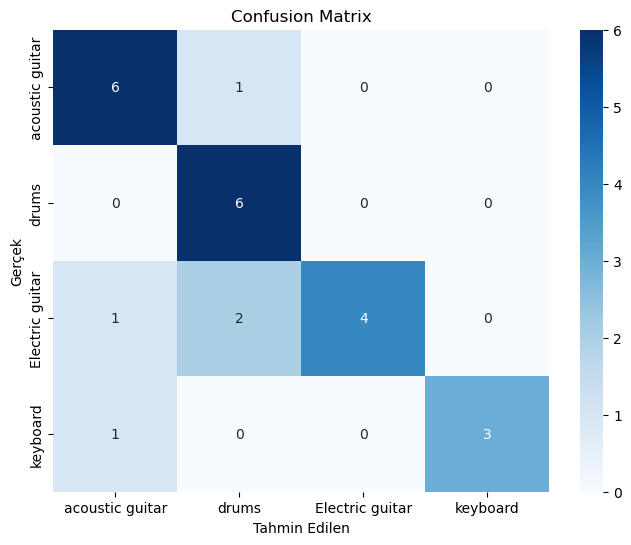

In [5]:
cm = confusion_matrix(y_test, best_model_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=selected_classes, yticklabels=selected_classes)
plt.xlabel('Tahmin Edilen')
plt.ylabel('Gerçek')
plt.title('Confusion Matrix')
plt.show()

Bu kod bloğu, en iyi modelin performansını daha ayrıntılı incelemek için bir karışıklık matrisi oluşturur ve görselleştirir. Karışıklık matrisi, gerçek etiketlerle modelin tahmin ettiği etiketler arasındaki farkları gösteren bir tablodur. Bu matris, doğru sınıflandırmaları ve modelin yanlış tahmin ettiği sınıfları sayısal olarak sunar.

Öncelikle, `confusion_matrix` fonksiyonu ile gerçek ve tahmin edilen etiketler karşılaştırılır. Bu işlem sonucunda elde edilen matris, doğru tahmin edilen ve karıştırılan sınıfları hücrelerde gösterir. Daha sonra, bu matris `seaborn` kütüphanesinin `heatmap` fonksiyonu kullanılarak bir ısı haritası şeklinde görselleştirilir. 

Grafik üzerinde her hücre, ilgili sınıflar arasındaki doğru veya yanlış tahminlerin sayısını içerir. Mavi tonlarındaki renk skalası, değerlerin yoğunluğunu vurgular. X ekseni tahmin edilen sınıfları, Y ekseni ise gerçek sınıfları temsil eder. Son olarak, grafik üzerinde eksen etiketleri ve bir başlık eklenerek matris daha açıklayıcı hale getirilir. Bu görselleştirme, modelin hangi sınıflarda güçlü olduğunu ve hangi sınıflarda daha fazla hata yaptığını analiz etmeye yardımcı olur.

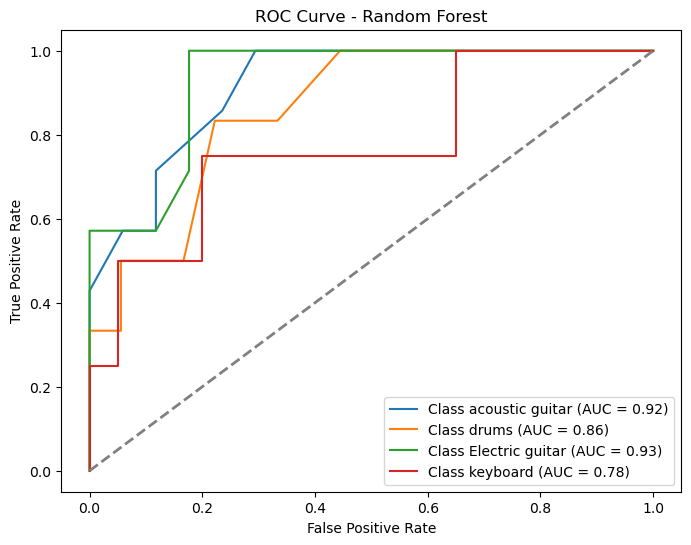

In [6]:
# binarize etmek
y_train_bin = label_binarize(y_train, classes=[0, 1, 2, 3])
y_test_bin = label_binarize(y_test, classes=[0, 1, 2, 3])

ovr_model = OneVsRestClassifier(models[best_model_name])
ovr_model.fit(X_train_pca, y_train_bin)
y_pred_proba = ovr_model.predict_proba(X_test_pca)

fpr = dict()
tpr = dict()
roc_auc = dict()

for i in range(len(selected_classes)):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_pred_proba[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# ROC-AUC Curve çizme
plt.figure(figsize=(8, 6))
for i in range(len(selected_classes)):
    plt.plot(fpr[i], tpr[i], label=f'Class {selected_classes[i]} (AUC = {roc_auc[i]:.2f})')

plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title(f'ROC Curve - {best_model_name}')
plt.legend(loc='lower right')
plt.show()


Bu kod, en iyi modelin performansını birden fazla sınıf için ROC-AUC eğrisi ile değerlendirir. İlk olarak, `label_binarize` fonksiyonu ile etiketler ikili formata dönüştürülür. Ardından, **OneVsRestClassifier** kullanılarak her sınıf için bir model eğitilir ve `predict_proba` ile olasılık tahminleri yapılır.

Sonraki adımda, **ROC eğrisi** ve **AUC (Area Under the Curve)** hesaplanır. Her sınıf için yanlış pozitif oranı (FPR) ve doğru pozitif oranı (TPR) hesaplanır ve `auc` fonksiyonu ile AUC değeri elde edilir.

Son olarak, `matplotlib` ile ROC eğrileri çizilir. Her sınıfın AUC değeri görselleştirilir ve diyagonal bir çizgi eklenerek modelin performansı değerlendirilir. Bu görselleştirme, modelin her sınıf için doğruluğunu ve etkinliğini gösterir.

In [7]:
joblib.dump(models['Random Forest'], 'random_forest_model.pkl')
joblib.dump(pca, 'pca_transform.pkl')
joblib.dump(encoder, 'label_encoder.pkl')

['label_encoder.pkl']

Bu kod, eğitilen model, PCA (Principal Component Analysis) dönüşümü ve etiket dönüştürücüsünü (Label Encoder) dosya olarak kaydeder. 

- `joblib.dump(models['Random Forest'], 'random_forest_model.pkl')` komutu, en iyi model olan Random Forest sınıflandırıcısını `random_forest_model.pkl` adlı dosyaya kaydeder. Bu dosya, modelin yeniden kullanılabilmesi için saklanır.
  
- `joblib.dump(pca, 'pca_transform.pkl')` komutu, PCA dönüşümünü `pca_transform.pkl` dosyasına kaydeder. Bu, verinin boyutunu azaltmak için kullanılan PCA modelinin tekrar kullanılabilmesini sağlar.

- `joblib.dump(encoder, 'label_encoder.pkl')` komutu, etiketlerin ikili (binary) hale getirilmesi için kullanılan `LabelEncoder`'ı `label_encoder.pkl` dosyasına kaydeder. Bu dosya, etiketlerin dönüştürülmesi sırasında kullanılmak üzere saklanır.

Bu şekilde kaydedilen dosyalar, eğitim tamamlandıktan sonra modelin, dönüşümlerin ve etiketlerin daha sonra tekrar kullanılabilmesi için saklanır.

In [8]:
def predict_instrument(image_path):

    img = load_img(image_path, target_size=(150, 150))
    img_array = img_to_array(img) / 255.0
    img_array_flat = img_array.reshape(1, -1)
    
    pca = joblib.load('pca_transform.pkl')
    img_pca = pca.transform(img_array_flat)
    
    model = joblib.load('random_forest_model.pkl')
    prediction = model.predict(img_pca)
    
    encoder = joblib.load('label_encoder.pkl')
    predicted_label = encoder.inverse_transform(prediction)[0]
    
    return predicted_label

Bu fonksiyon, verilen bir görselin hangi müzik aletini temsil ettiğini tahmin etmek için kullanılır.

- **Görselin Yüklenmesi ve İşlenmesi**: İlk olarak, `load_img` fonksiyonu ile belirtilen `image_path` adresindeki görsel yüklenir ve hedef boyut (150x150) ile yeniden boyutlandırılır. Görsel, `img_to_array` fonksiyonu ile bir NumPy dizisine dönüştürülür ve ardından pixel değerleri 0 ile 1 arasında normalleştirilir.

- **PCA Dönüşümü**: PCA dönüşüm dosyası (`pca_transform.pkl`) `joblib.load` ile yüklenir ve görselin özellikleri bu dönüşüm ile daha düşük boyutlu hale getirilir.

- **Model Yükleme ve Tahmin**: `random_forest_model.pkl` dosyasındaki Random Forest modelini `joblib.load` ile yükler ve PCA dönüşümünden elde edilen verilerle tahmin yapılır.

- **Etiketin Dönüştürülmesi**: Modelin tahmin ettiği sayısal etiket, `label_encoder.pkl` dosyasından yüklenen `LabelEncoder` ile orijinal etiketine dönüştürülür.

- **Sonuç**: Tahmin edilen etiket (müzik aleti) döndürülür.

Bu fonksiyon, verilen bir görselin müzik aleti türünü (örneğin, "akustik gitar", "davul", vb.) tahmin etmek için kullanılabilir.

In [11]:
image_path = "test_img/acusticdeneme.jpg"
result = predict_instrument(image_path)
print(f"Tahmin edilen çalgı aleti: {result}")

Tahmin edilen çalgı aleti: acoustic guitar


Bu kod parçası, `predict_instrument` fonksiyonunu kullanarak belirtilen bir görselin hangi çalgı aletine ait olduğunu tahmin eder ve sonucu ekrana yazdırır.

- `image_path = "test_img/drums2deneme.jpg"`: Burada, tahmin edilecek görselin dosya yolu belirtilmiştir. Bu örnekte, "drums2deneme.jpg" adlı bir görsel "test_img" klasöründe bulunmaktadır.
  
- `result = predict_instrument(image_path)`: `predict_instrument` fonksiyonu, belirtilen görsel yolunu alır, görseli işler, PCA ve model tahminlerini yapar, ardından tahmin edilen etiketin dönüşümünü gerçekleştirir.

- `print(f"Tahmin edilen çalgı aleti: {result}")`: Son olarak, tahmin edilen çalgı aleti (örneğin, "drums") ekrana yazdırılır.

Bu işlem, modelin ve dönüşümlerin doğru şekilde kaydedildiği ve fonksiyonların düzgün çalıştığı varsayılarak, görselin tahmin edilen müzik aleti türünü verir.